In [33]:
# import packages
import pandas as pd
"""
DATASET SOURCE is from https://github.com/arjbah/nsl-kdd.git (include the most attack types)
https://github.com/defcom17/NSL_KDD.git
"""
train_file = 'DATA/KDDTrain+.txt'
test_file = 'DATA/KDDTest+.txt'
field_name_file = 'DATA/Field_Names.csv'
attack_type_file = 'DATA/Attack_Types.csv'

In [ ]:
# 这里就是常规的pandas 读csv 或txt 操作，注意列表头/列名称的处理。

In [35]:
# 处理标签
field_names_df = pd.read_csv(field_name_file, header=None, names=['name', 'data_type']) # 定义dataframe ，并给个column name，方便索引
field_names = field_names_df['name'].tolist()
field_names += ['label', 'label_code'] # 源文件中没有标签名称，以及等级信息

# 加载数据
df = pd.read_csv(train_file, header=None, names=field_names)
df_test = pd.read_csv(test_file, header=None, names=field_names)
attack_type_df = pd.read_csv(attack_type_file, sep=' ', header=None, names=['name', 'attack_type'])

# 处理数据
attack_type_dict = dict(zip(attack_type_df['name'].tolist(), attack_type_df['attack_type'].tolist())) # 定义5大类和小类的映射字典，方便替代
df.drop('label_code', axis=1, inplace=True) # 最后一列 既无法作为feature，也不是我们的label，删掉
df_test.drop('label_code', axis=1, inplace=True)
df['label'].replace(attack_type_dict, inplace=True) # 替换label 为5 大类
df_test['label'].replace(attack_type_dict, inplace=True)

In [42]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [46]:
# 首先我们来看label的分布：

from collections import Counter

# 简单定义一个print 函数
def print_label_dist(label_col):
    c = Counter(label_col)
    print(f'label is {c}')


print_label_dist(df['label'])
print_label_dist(df_test['label'])

label is Counter({'normal': 67343, 'neptune': 41214, 'satan': 3633, 'ipsweep': 3599, 'portsweep': 2931, 'smurf': 2646, 'nmap': 1493, 'back': 956, 'teardrop': 892, 'warezclient': 890, 'pod': 201, 'guess_passwd': 53, 'buffer_overflow': 30, 'warezmaster': 20, 'land': 18, 'imap': 11, 'rootkit': 10, 'loadmodule': 9, 'ftp_write': 8, 'multihop': 7, 'phf': 4, 'perl': 3, 'spy': 2})
label is Counter({'normal': 9711, 'neptune': 4657, 'guess_passwd': 1231, 'mscan': 996, 'warezmaster': 944, 'apache2': 737, 'satan': 735, 'processtable': 685, 'smurf': 665, 'back': 359, 'snmpguess': 331, 'saint': 319, 'mailbomb': 293, 'snmpgetattack': 178, 'portsweep': 157, 'ipsweep': 141, 'httptunnel': 133, 'nmap': 73, 'pod': 41, 'buffer_overflow': 20, 'multihop': 18, 'named': 17, 'ps': 15, 'sendmail': 14, 'xterm': 13, 'rootkit': 13, 'teardrop': 12, 'xlock': 9, 'land': 7, 'xsnoop': 4, 'ftp_write': 3, 'loadmodule': 2, 'worm': 2, 'perl': 2, 'sqlattack': 2, 'udpstorm': 2, 'phf': 2, 'imap': 1})


In [ ]:
# 为了更直观的对比，我们可以看一下countplot 的结果。

D:\15283\AppData\local\Temp\ipykernel_28644\2113693789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_label['type'] = 'train'
D:\15283\AppData\local\Temp\ipykernel_28644\2113693789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_label['type'] = 'test'


         label   type
0       normal  train
1       normal  train
2      neptune  train
3       normal  train
4       normal  train
...        ...    ...
22539   normal   test
22540   normal   test
22541     back   test
22542   normal   test
22543    mscan   test

[148517 rows x 2 columns]
         label  type
0      neptune  test
1      neptune  test
2       normal  test
3        saint  test
4        mscan  test
...        ...   ...
22539   normal  test
22540   normal  test
22541     back  test
22542   normal  test
22543    mscan  test

[22544 rows x 2 columns]


<Axes: xlabel='label', ylabel='count'>

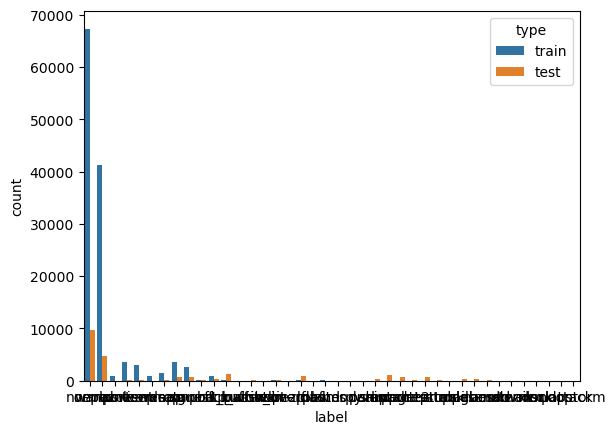

In [47]:
import seaborn as sns

train_label= df[['label']]
train_label['type'] = 'train'
test_label= df_test[['label']]
test_label['type'] = 'test'
label_all = pd.concat([train_label,test_label],axis=0)
print(label_all)
print(test_label)
sns.countplot(x='label',hue='type', data=label_all)

In [49]:
Y = df['label']
Y_test = df_test['label']
X = df.drop('label', axis=1)
X_test = df_test.drop('label', axis=1)

In [51]:
# 分离离散变量
def split_category(data, columns):
    cat_data = data[columns]
    rest_data = data.drop(columns, axis=1)
    return rest_data, cat_data
#  转所有离散变量为one-hot
def one_hot_cat(data):
    if isinstance(data, pd.Series):
        data = pd.DataFrame(data, columns=[data.name])
    out = pd.DataFrame([])
    for col in data.columns:
        one_hot_cols = pd.get_dummies(data[col], prefix=col)
        out = pd.concat([out, one_hot_cols], axis=1)
    out.set_index(data.index)
    return out

In [52]:
# categorical_columns
categorical_mask = (X.dtypes == object)
categorical_columns = X.columns[categorical_mask].tolist()
X, X_cat = split_category(X, categorical_columns)
X_test, X_test_cat = split_category(X_test, categorical_columns)
# convert to one-hot
X_cat_one_hot_cols = one_hot_cat(X_cat)
X_test_cat_one_hot_cols = one_hot_cat(X_test_cat)
# align train to test
X_cat_one_hot_cols, X_test_cat_one_hot_cols = X_cat_one_hot_cols.align(
    X_test_cat_one_hot_cols, join='inner', axis=1)
X_cat_one_hot_cols.fillna(0, inplace=True)
X_test_cat_one_hot_cols.fillna(0, inplace=True)
X = pd.concat([X, X_cat_one_hot_cols], axis=1)
X_test = pd.concat([X_test, X_test_cat_one_hot_cols],
                   axis=1)
print(f'add one-hot features')

add one-hot features


In [53]:
X.shape

(125973, 116)

In [57]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,f1_score

feature_name = list(X.columns) # 特征名称后续会用到
Y_encode = LabelEncoder().fit_transform(Y)
Y_test_encode = LabelEncoder().fit_transform(Y_test)
dtrain = lgb.Dataset(X.values, label=Y_encode)
dtest = lgb.Dataset(X_test.values, label=Y_test_encode)
param = {
    'eta': 0.1,
    'objective': 'multiclass',
    'num_class': 5,
    'verbose': 0,
        'metric':'multi_error'
} # 参数几乎都是默认值，仅仅修改一些多分类必须的参数
evals_result = {}
valid_sets = [dtrain, dtest]
valid_name = ['train', 'eval']
model = lgb.train(param, dtrain, num_boost_round=500, feature_name=feature_name,
                  valid_sets=valid_sets, valid_names=valid_name)
y_pred_1 = model.predict(X_test.values)
y_pred = pd.DataFrame(y_pred_1).idxmax(axis=1) #预测概率值转为预测标签
#
# 我们用了多种metric 来衡量结果，其中有些是明显不适合的，比如accuracy，因为它会被不平衡的数据分布带到阴沟里（误导）。
print(f'auc score is {accuracy_score(Y_test_encode, y_pred)}')
print(confusion_matrix(Y_test_encode, y_pred))
print(classification_report(Y_test_encode, y_pred, digits=3))
auc = roc_auc_score(Y_test_encode, y_pred_1, multi_class="ovo", average="macro") # 选用macro 很重要。参考sklearn。
#Calculate metrics for each label, and find their unweighted mean. #This does not take label imbalance into account.
print(f'roc_auc_score  is {auc}')
f1 = f1_score(y_pred, Y_test_encode, average='macro')
print(f'f1_score  is {f1}')

LightGBMError: Label must be in [0, 5), but found 11 in label